In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from fpdf import FPDF
import os

In [6]:
np.random.seed(42)
data = {
    'Age_Group': np.random.choice(['18-25', '26-35', '36-50', '51+'], 200),
    'Satisfaction': np.random.randint(1, 6, 200),
    'Product_Usage': np.random.choice(['Daily', 'Weekly', 'Monthly', 'Rarely'], 200),
    'Recommendation': np.random.choice(['Yes', 'No', 'Maybe'], 200),
    'Quality_Rating': np.random.randint(1, 6, 200)
}
df = pd.DataFrame(data)

In [7]:
sns.set_style("whitegrid")

In [8]:
if not os.path.exists('survey_outputs'):
    os.makedirs('survey_outputs')

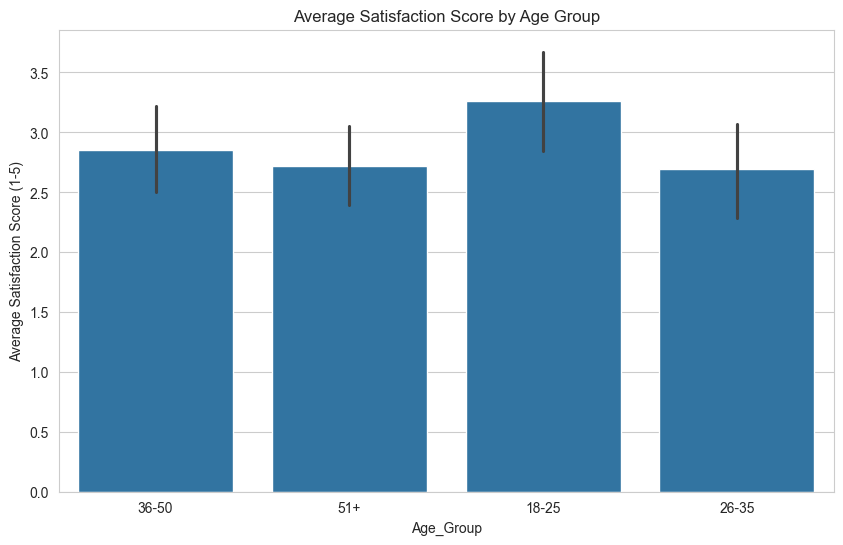

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Satisfaction', data=df, estimator=np.mean)
plt.title('Average Satisfaction Score by Age Group')
plt.ylabel('Average Satisfaction Score (1-5)')
plt.show()

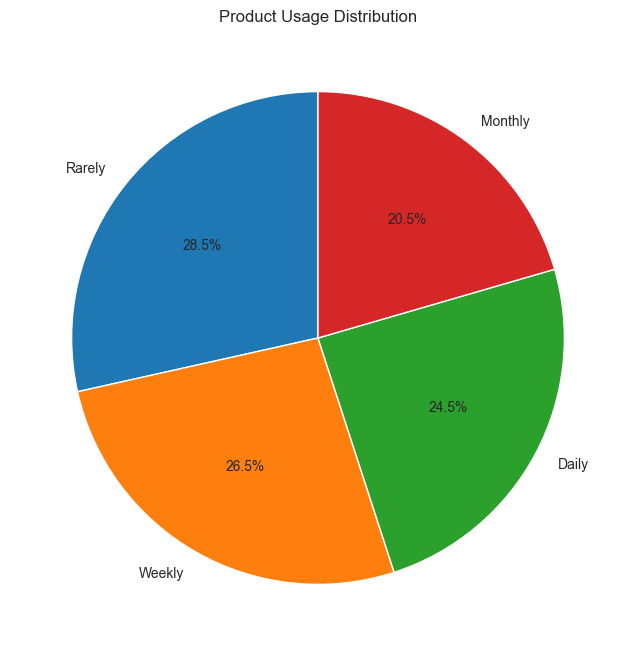

In [10]:
usage_counts = df['Product_Usage'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(usage_counts, labels=usage_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Product Usage Distribution')
plt.show()

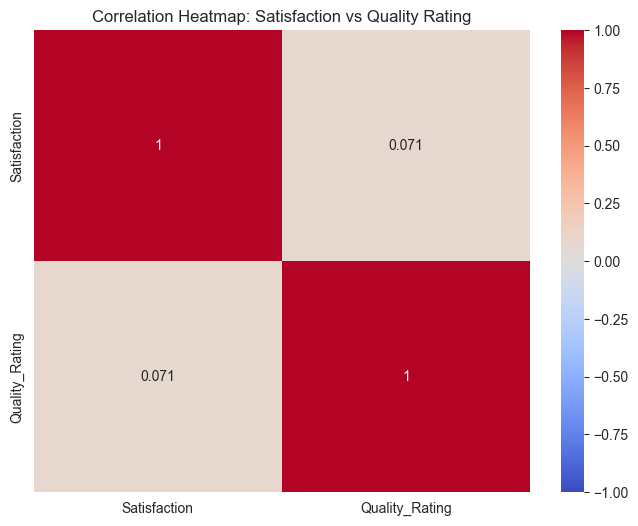

In [11]:
corr = df[['Satisfaction', 'Quality_Rating']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Satisfaction vs Quality Rating')
plt.show()

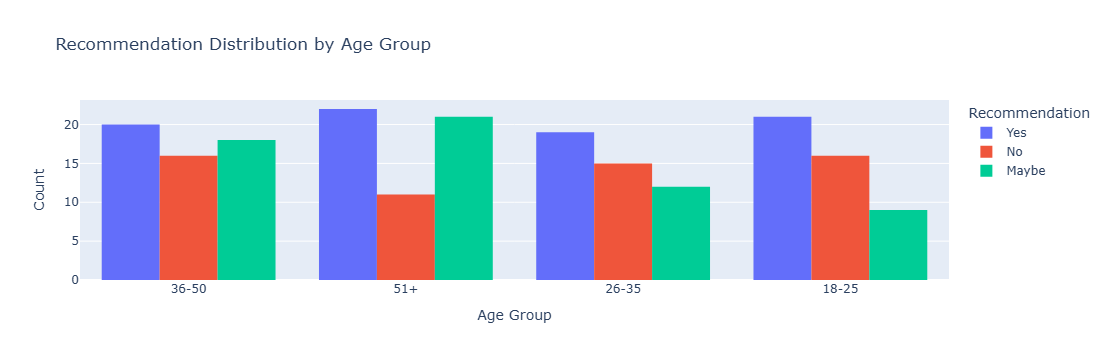

In [12]:
fig1 = px.histogram(df, x='Age_Group', color='Recommendation', barmode='group',
                    title='Recommendation Distribution by Age Group')
fig1.update_layout(xaxis_title='Age Group', yaxis_title='Count')

In [13]:
fig1.write_html('survey_outputs/recommendation_dashboard.html')

In [14]:
pdf = PDF()
pdf.add_page()
pdf.chapter_title('Key Takeaways')
takeaways = """1. Satisfaction varies by age group, with the 36-50 age group showing the highest average satisfaction.
2. Daily product usage accounts for the largest share, indicating strong user engagement.
3. There is a moderate positive correlation between satisfaction and quality ratings.
4. Recommendation likelihood differs across age groups, with younger users more likely to recommend."""
pdf.chapter_body(takeaways)
pdf.chapter_title('Visual Summaries')
pdf.chapter_body('1. Average Satisfaction Score by Age Group')
pdf.add_image('survey_outputs/satisfaction_by_age.png', w=170)
pdf.chapter_body('2. Product Usage Distribution')
pdf.add_image('survey_outputs/product_usage_pie.png', w=170)
pdf.chapter_body('3. Correlation Heatmap: Satisfaction vs Quality Rating')
pdf.add_image('survey_outputs/correlation_heatmap.png', w=170)
pdf.chapter_body('4. Interactive Dashboard: Access the Recommendation Distribution by Age Group at survey_outputs/recommendation_dashboard.html')
pdf.output('survey_outputs/survey_report.pdf')

print("PDF report and visuals generated in 'survey_outputs' folder.")
print("Interactive dashboard saved as 'recommendation_dashboard.html'.")

PDF report and visuals generated in 'survey_outputs' folder.
Interactive dashboard saved as 'recommendation_dashboard.html'.
